In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#Check if there is any missing data
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = round((data.isnull().sum()/data.isnull().count()*100), 2).sort_values(ascending=False)
    ms_val = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms_val = ms_val[ms_val["Percent"]>0]
    f, ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms_val.index, ms_val["Percent"], color="blue", alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage of Missing Values', fontsize=15)
    return ms_val

In [5]:
#missingdata(df)
#The code didn't run because there is no missing values in this data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
column_names = {'T1':'temp_in_kitchen', 'RH_1': 'humidity_in_kitchen', 
                'T2':'temp_in_living_room', 'RH_2': 'humidity_in_living_room',
                'T3':'temp_in_laundry_room', 'RH_3': 'humidity_in_laundry_room', 
                'T4':'temp_in_office_room', 'RH_4': 'humidity_in_office_room',
                'T5':'temp_in_bath_room', 'RH_5': 'humidity_in_bath_room', 
                'T6':'temp_outside_building', 'RH_6': 'humidity_outside_building', 
                'T7':'temp_in_ironing_room', 'RH_7': 'humidity_in_ironing_room', 
                'T8':'temp_in_teen_room', 'RH_8': 'humidity_in_teen_room', 
                'T9':'temp_in_parents_room', 'RH_9': 'humidity_in_parents_room',
                'T_out':'temp_outside', 'RH_out': 'humidity_outside'}

In [8]:
df = df.rename(columns = column_names)

In [9]:
df.head()
#The feature headings are better this way

,date,Appliances,lights,temp_in_kitchen,humidity_in_kitchen,temp_in_living_room,humidity_in_living_room,temp_in_laundry_room,humidity_in_laundry_room,temp_in_office_room,...,temp_in_parents_room,humidity_in_parents_room,temp_outside,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


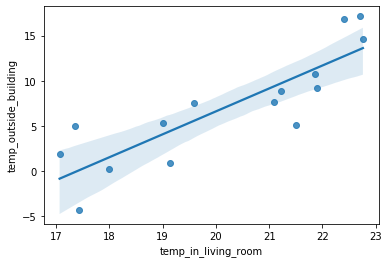

In [35]:
simple_linear_reg_df = df[['temp_in_living_room', 'temp_outside_building']].sample(15, random_state=2)
sns.regplot(x='temp_in_living_room', y='temp_outside_building', data=simple_linear_reg_df)
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

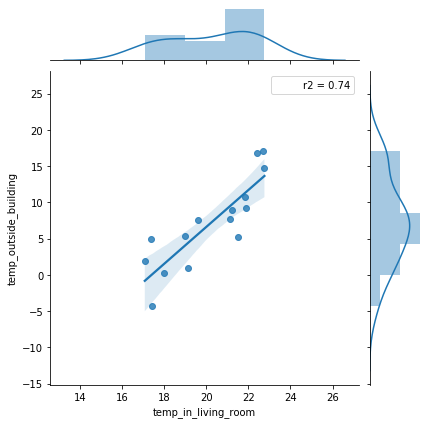

In [34]:
simple_linear_reg_df = df[['temp_in_living_room', 'temp_outside_building']].sample(15, random_state=2)


from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
#sns.jointplot(x, y, kind="reg", stat_func=r2)


sns.jointplot(x='temp_in_living_room', y='temp_outside_building', kind="reg", data=simple_linear_reg_df, stat_func=r2)

In [10]:
#I won't be needing timestamp for this analysis, hence, I will be dropping date and lights too.
df.drop(columns=['date', 'lights'], inplace=True)

In [11]:
df.head()

,Appliances,temp_in_kitchen,humidity_in_kitchen,temp_in_living_room,humidity_in_living_room,temp_in_laundry_room,humidity_in_laundry_room,temp_in_office_room,humidity_in_office_room,temp_in_bath_room,...,temp_in_parents_room,humidity_in_parents_room,temp_outside,Press_mm_hg,humidity_outside,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


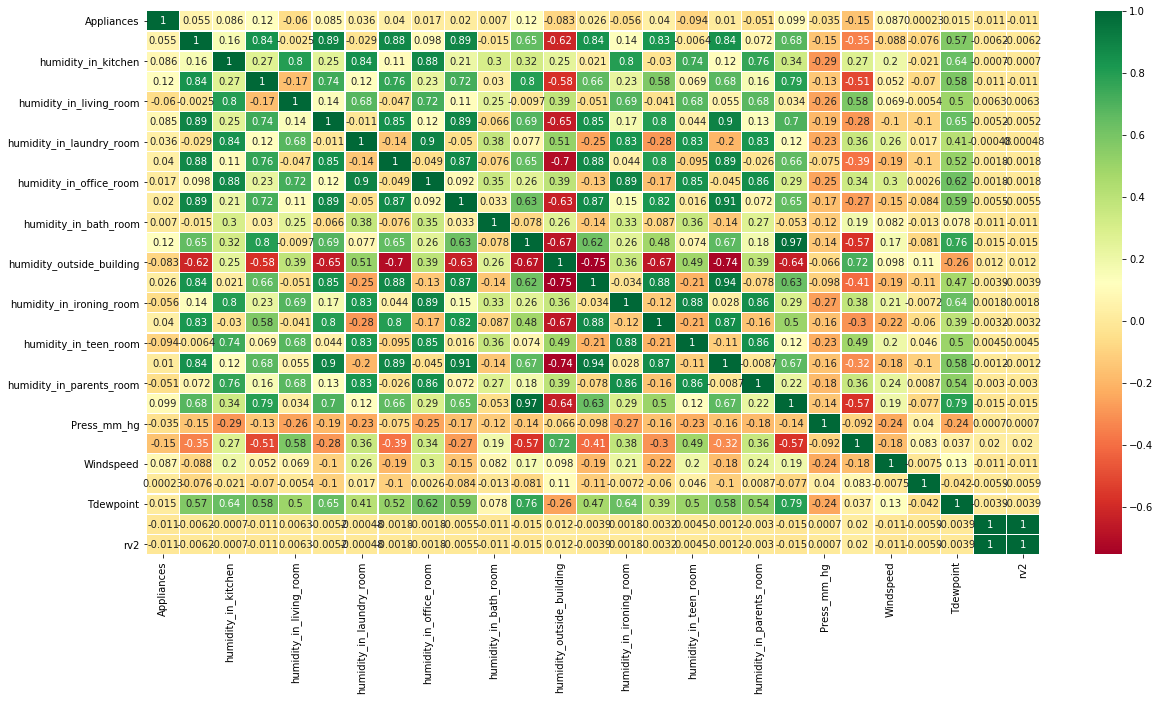

In [12]:
#I want to see the correlation between the features and the target variable
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [13]:
#rv1 and rv2 are perfectly correlated
#Many of the features have high correlation.

In [48]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
feat_df =  normalised_df.drop('Appliances', axis=1)
#Why not drop rv2?
target_df = normalised_df['Appliances']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(feat_df, target_df, test_size=0.3,random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13814, 26), (5921, 26), (13814,), (5921,))

In [51]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predicted_values = linear_model.predict(X_test)

In [52]:
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)
#Is the error better when lower?

0.05

In [53]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

In [70]:
from sklearn.metrics import mean_squared_error
rmselr = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmselr, 3)

0.088

In [55]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
predicted_ridge_values = ridge_reg.predict(X_test)

In [67]:
mae = mean_absolute_error(y_test, predicted_ridge_values)
round(mae, 3)

0.05

In [68]:
rss = np.sum(np.square(y_test - predicted_ridge_values))
round(rss, 3)

45.368

In [72]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_ridge_values))
round(rmse, 3)

0.088

In [73]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
predicted_lasso_values = lasso_reg.predict(X_test)

In [74]:
mae = mean_absolute_error(y_test, predicted_lasso_values)
round(mae, 3)

0.055

In [75]:
rss = np.sum(np.square(y_test - predicted_lasso_values))
round(rss, 3)

51.853

In [79]:
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_lasso_values))
round(rmse2, 3)

0.094

In [77]:
#comparing the effects of regularization
def get_weights_df(model, feat, col_name):
    #this function returns the weights of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [78]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,humidity_in_living_room,-0.456698,-0.411071,-0.000000
1,temp_outside,-0.321860,-0.262172,0.000000
2,temp_in_living_room,-0.236178,-0.201397,0.000000
3,temp_in_parents_room,-0.189941,-0.188916,-0.000000
4,humidity_in_teen_room,-0.157595,-0.156830,-0.000110
5,humidity_outside,-0.077671,-0.054724,-0.049557
6,humidity_in_ironing_room,-0.044614,-0.045977,-0.000000
7,humidity_in_parents_room,-0.039800,-0.041367,-0.000000
8,temp_in_bath_room,-0.015657,-0.019853,-0.000000
9,temp_in_kitchen,-0.003281,-0.018406,0.000000
